In [3]:
import jeans
import simulations as sim

import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import pandas as pd

# Eagle-50 Simulation Data 

Details about the simualtion data can be accesses [here](zenodo.org/records/16331984). 

There are three simulation models: "SIDM1b", "CDMb", and "vdSIDMb".

For each model there are 250 halos indexed by a halo_id in the range [0,249].

The GitHub version of the data only contains 5 example halos (halo_id [0,4]). To access all of the 250 halos please download the data with the link above. 

The data can be read directly from the hdf5 files, as illustrated below. 

However, this package includes a helper script--simulations.py--with a 'fit' class for easy access to the data. See the next section for examples on how to use it. 

## Reading hdf5 Directly

In [29]:
MODEL = 'SIDM1b'
data_path = os.getcwd() + f'/data/EAGLE-50-data/'

spherical_data_filename = f'{MODEL}_sphericallyAveraged_density_profiles.hdf5'
cylindrical_data_filename = f'{MODEL}_cylindrical_density_and_potential.hdf5'
axisymmetric_data_filename = f'{MODEL}_axisymmetric_shape_profiles.hdf5'

# Example loading the keys from the spherical data file
with h5py.File(data_path + spherical_data_filename, 'r') as f:
    print("Spherically Averaged Data Keys:", list(f.keys()))
    print('\n')
    
# Example loading the files inside of the spherical data file
with h5py.File(data_path + spherical_data_filename, 'r') as f:
    M200_data = f['M200'][0:5] # first 5 halo masses 
    print('M200 for the first 5 halos:', M200_data)
    print('\n')
    
HaloID = 0  # Example Halo ID
# Example dm density profile for halo 0 
with h5py.File(data_path + spherical_data_filename, 'r') as f:
    rho_dm = f['dm_rho'][4] # units of Msun/Mpc^3
    r = f['rs'][HaloID] # units of Mpc 

df = pd.DataFrame({'r (Mpc)': r, 'rho_dm (Msun/Mpc^3)': rho_dm})
print(df.iloc[20:30])  
    

Spherically Averaged Data Keys: ['GrNm', 'M200', 'bh_M', 'bh_M_r200', 'bh_rho', 'dm_M', 'dm_M_r200', 'dm_rho', 'gas_M', 'gas_M_r200', 'gas_rho', 'pos', 'r200', 'redges', 'rs', 'star_M', 'star_M_r200', 'star_rho']


M200 for the first 5 halos: [1.63005271e+14 1.78200537e+13 4.42767702e+13 3.38729969e+13
 2.51722710e+13]


     r (Mpc)  rho_dm (Msun/Mpc^3)
20  0.000878         6.430270e+16
21  0.000976         5.459014e+16
22  0.001085         6.809820e+16
23  0.001206         6.194180e+16
24  0.001341         4.507358e+16
25  0.001491         6.559794e+16
26  0.001658         4.455179e+16
27  0.001843         4.978676e+16
28  0.002049         3.875622e+16
29  0.002278         3.617210e+16


## Using the built-in fit class in simulations.py 

simulations.py allows you to create class object for each halo ID and model. The halo properties are saved as class attributes and the data is easily accessed via methods of the class, as demonstrated below. 

In [5]:
# import simulations as sim

In [6]:
# loading the simulation data with the fit class
halo_id = 0

# Create a class instance for each model 
sidm = sim.fit(halo_id, model="SIDM1b")
sidmv = sim.fit(halo_id, model="vdSIDMb")
cdm = sim.fit(halo_id, model="CDMb")

In [7]:
# M200 and R200 values
print(f"M200 for SIDM halo {halo_id} is {sidm.M200:.2e} Msun.")
print(f"M200 for vdSIDM halo {halo_id} is {sidmv.M200:.2e} Msun.")
print(f"M200 for CDM halo {halo_id} is {cdm.M200:.2e} Msun.")
print(f'R200 for SIDM halo {halo_id} is {sidm.R200:.2f} kpc.')
print(f'R200 for vdSIDM halo {halo_id} is {sidmv.R200:.2f} kpc.')
print(f'R200 for CDM halo {halo_id} is {cdm.R200:.2f} kpc.')

M200 for SIDM halo 0 is 7.41e+11 Msun.
M200 for vdSIDM halo 0 is 7.39e+11 Msun.
M200 for CDM halo 0 is 7.11e+11 Msun.
R200 for SIDM halo 0 is 190.71 kpc.
R200 for vdSIDM halo 0 is 190.61 kpc.
R200 for CDM halo 0 is 188.15 kpc.


## Spherically Averaged Density Profiles

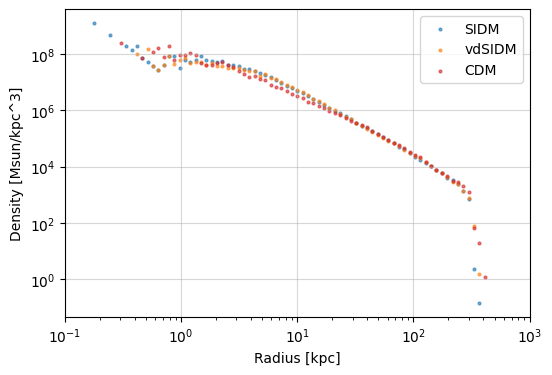

In [8]:
# Load density dictionaries from the class methods
rho_dm_sidm = sidm.sph_avg_dm_density() # keys are 'r', 'rho'
rho_dm_sidmv = sidmv.sph_avg_dm_density()
rho_dm_cdm = cdm.sph_avg_dm_density()


plt.figure(figsize=(6,4))
plt.scatter(rho_dm_sidm['r'], rho_dm_sidm['rho'], label=f"SIDM", c='C0', alpha=0.6, s=4)
plt.scatter(rho_dm_sidmv['r'], rho_dm_sidmv['rho'], label=f"vdSIDM", c='C1', alpha=0.6, s=4)
plt.scatter(rho_dm_cdm['r'], rho_dm_cdm['rho'], label=f"CDM", c='C3', alpha=0.6, s=4)

plt.xlabel('Radius [kpc]')
plt.ylabel('Density [Msun/kpc^3]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 1000)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()

You may also access the density profiles for the baryons (stars, gas, black holes)

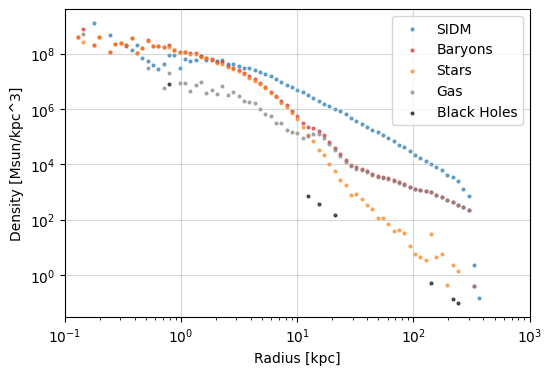

In [9]:
rho_dm_sidm = sidm.sph_avg_dm_density() # keys are 'r', 'rho'
rho_baryon_sidm = sidm.sph_avg_baryon_density()
rho_star_sidm = sidm.sph_avg_star_density()
rho_gas_sidm = sidm.sph_avg_gas_density()
rho_bh_sidm = sidm.sph_avg_bh_density()


plt.figure(figsize=(6,4))
plt.scatter(rho_dm_sidm['r'], rho_dm_sidm['rho'], label='SIDM', c='C0', alpha=0.6, s=4)
plt.scatter(rho_baryon_sidm['r'], rho_baryon_sidm['rho'], label='Baryons', c='C3', alpha=0.6, s=4)
plt.scatter(rho_star_sidm['r'], rho_star_sidm['rho'], label='Stars', c='C1', alpha=0.6, s=4)
plt.scatter(rho_gas_sidm['r'], rho_gas_sidm['rho'], label='Gas', c='grey', alpha=0.6, s=4)
plt.scatter(rho_bh_sidm['r'], rho_bh_sidm['rho'], label='Black Holes', c='k', alpha=0.6, s=4)

plt.xlabel('Radius [kpc]')
plt.ylabel('Density [Msun/kpc^3]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 1000)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()

## Mass Profiles 

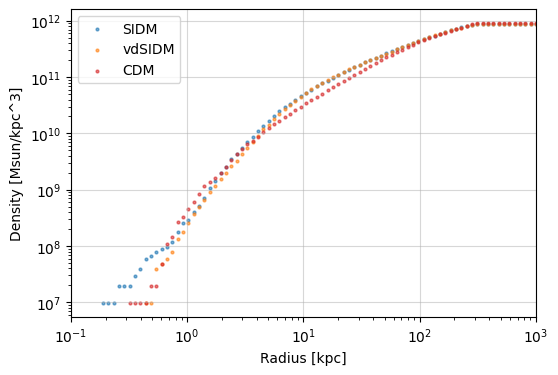

In [10]:
# Load mass dictionaries from the class methods
m_dm_sidm = sidm.dm_mass_enclosed() # keys are 'r', 'rho'
m_dm_sidmv = sidmv.dm_mass_enclosed()
m_dm_cdm = cdm.dm_mass_enclosed()


plt.figure(figsize=(6,4))
plt.scatter(m_dm_sidm['r'], m_dm_sidm['M_dm'], label=f"SIDM", c='C0', alpha=0.6, s=4)
plt.scatter(m_dm_sidmv['r'], m_dm_sidmv['M_dm'], label=f"vdSIDM", c='C1', alpha=0.6, s=4)
plt.scatter(m_dm_cdm['r'], m_dm_cdm['M_dm'], label=f"CDM", c='C3', alpha=0.6, s=4)

plt.xlabel('Radius [kpc]')
plt.ylabel('Density [Msun/kpc^3]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 1000)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()

Similarily for stars, gas, and the black hole. 

## Shapes

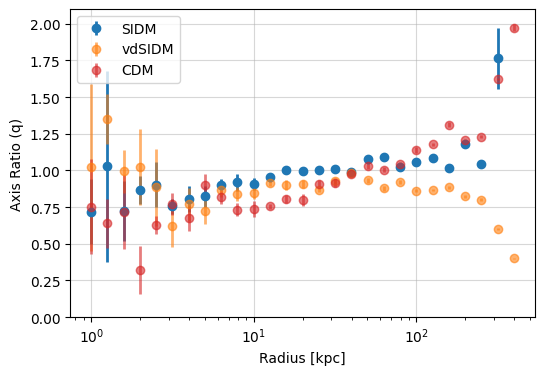

In [11]:
# Load axis ratio dictionaries from the class methods
q_dm_sidm = sidm.q_dm() # keys are 'r', 'q', 'error'
q_dm_sidmv = sidmv.q_dm()
q_dm_cdm = cdm.q_dm()

plt.figure(figsize=(6,4))
plt.errorbar(q_dm_sidm['r'], q_dm_sidm['q'], yerr=q_dm_sidm['error'], label='SIDM', c='C0', fmt='o', alpha=1.0, lw=2)
plt.errorbar(q_dm_sidmv['r'], q_dm_sidmv['q'], yerr=q_dm_sidmv['error'], label='vdSIDM', c='C1', fmt='o', alpha=0.6, lw=2)
plt.errorbar(q_dm_cdm['r'], q_dm_cdm['q'], yerr=q_dm_cdm['error'], label='CDM', c='C3', fmt='o', alpha=0.6, lw=2)
plt.xlabel('Radius [kpc]')
plt.ylabel('Axis Ratio (q)')
plt.xscale('log')
plt.ylim(0, 2.1)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()

Shape information is also available for the stars and gas. Note, that there are no errors on the star and gas axis ratios.

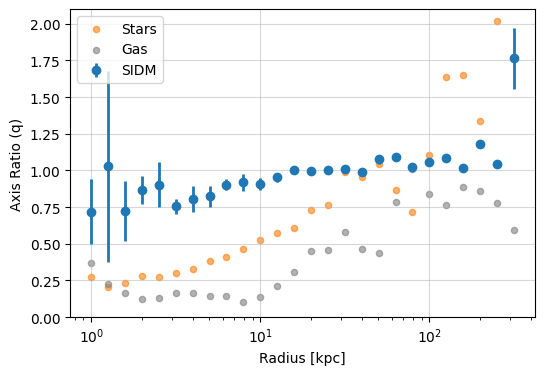

In [12]:
# Load axis ratio dictionaries from the class methods
q_dm_sidm = sidm.q_dm() # keys are 'r', 'q', 'error'
q_stars_sidm = sidm.q_stars()
q_gas_sidm = sidm.q_gas()

plt.figure(figsize=(6,4))
plt.errorbar(q_dm_sidm['r'], q_dm_sidm['q'], yerr=q_dm_sidm['error'], label='SIDM', c='C0', fmt='o', alpha=1.0, lw=2)
plt.scatter(q_stars_sidm['r'], q_stars_sidm['q'], label='Stars', c='C1', alpha=0.6, s=20)
plt.scatter(q_gas_sidm['r'], q_gas_sidm['q'], label='Gas', c='grey', alpha=0.6, s=20)
plt.xlabel('Radius [kpc]')
plt.ylabel('Axis Ratio (q)')
plt.xscale('log')
plt.ylim(0, 2.1)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()

## 2D Density Maps 

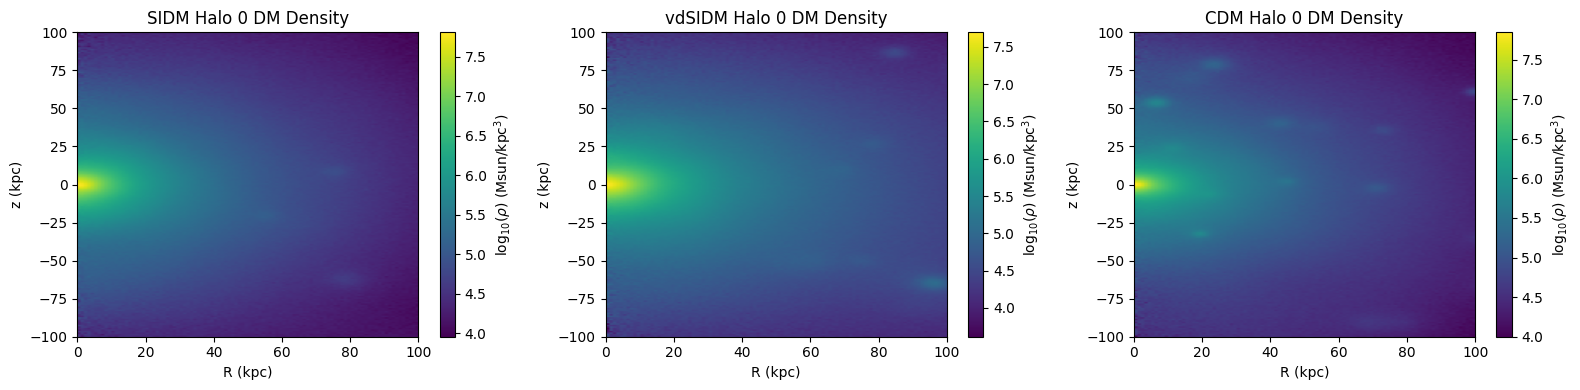

In [13]:
# Load 2D cylindrical density dictionaries from the class methods
rho_2D_sidm = sidm.cyl_dm_density() # keys are 'rho_2D', 'R', 'z', 'extent'
rho_2D_sidmv = sidmv.cyl_dm_density()
rho_2D_cdm = cdm.cyl_dm_density()

fig, axs = plt.subplots(1, 3, figsize=(16,4))

# sidm density first 
extent = rho_2D_sidm['extent']
im1 = axs[0].imshow(np.log10(rho_2D_sidm['rho_2D'].T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
axs[0].set_xlabel('R (kpc)')
axs[0].set_ylabel('z (kpc)')
axs[0].set_title(f'SIDM Halo {halo_id} DM Density')

# vdSIDM density second
extent = rho_2D_sidmv['extent']
im2 = axs[1].imshow(np.log10(rho_2D_sidmv['rho_2D'].T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
axs[1].set_xlabel('R (kpc)')
axs[1].set_ylabel('z (kpc)')
axs[1].set_title(f'vdSIDM Halo {halo_id} DM Density')

# cdm density second
extent = rho_2D_cdm['extent']
im2 = axs[2].imshow(np.log10(rho_2D_cdm['rho_2D'].T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar2 = fig.colorbar(im2, ax=axs[2])
cbar2.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
axs[2].set_xlabel('R (kpc)')
axs[2].set_ylabel('z (kpc)')
axs[2].set_title(f'CDM Halo {halo_id} DM Density')

plt.tight_layout()
plt.show()

# Inputting Simulation Phi_b into the jeans Model

In [14]:
# Loading the baryon potential and M200 from the simulation 
halo_id = 0
sidm = sim.fit(halo_id, model='SIDM1b')
Phi_b = sidm.Phi_b
M200 = sidm.M200

# Generate Jeans model with simulation baryon potential
r1 = 20
c = 10 
q0 = 1.0
AC_inputs = {'AC_prescription':'Cautun'}

profile = jeans.squashed(r1, M200, c, q0=q0, Phi_b=Phi_b, **AC_inputs)

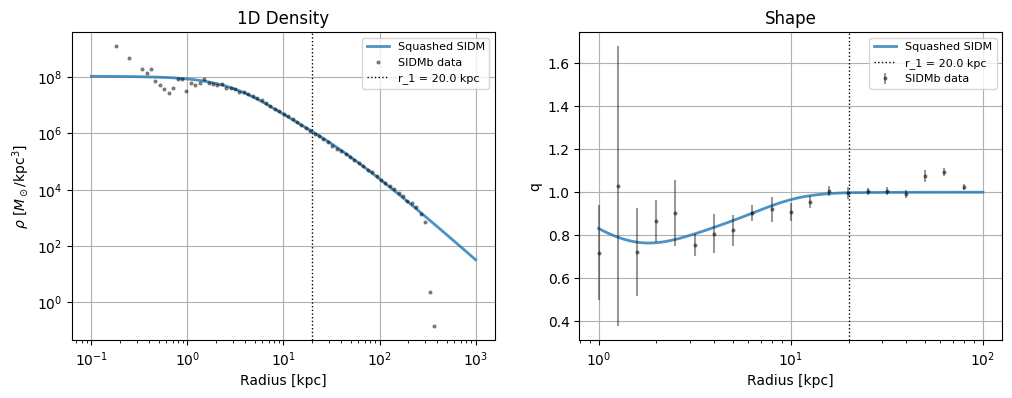

In [15]:
rho_data = sidm.sph_avg_dm_density()
shape_data = sidm.q_dm()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# 1D density profile 
select = (rho_data['r'] > 0) & (rho_data['r'] < 1000)
r = np.logspace(-1,3, num=100)
axs[0].loglog(r, profile.rho_sph_avg(r), label='Squashed SIDM', c='C0', alpha=0.8, ls='-', lw=2)
axs[0].loglog(rho_data['r'][select], rho_data['rho'][select], label='SIDMb data', c='k', alpha=0.4, ls='', marker='o', markersize=2)
axs[0].axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
axs[0].set_xlabel('Radius [kpc]')
axs[0].set_ylabel(r'$\rho$ [$M_\odot/\mathrm{kpc}^3$]')
axs[0].set_title('1D Density')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
select = (shape_data['r'] > 0) & (shape_data['r'] < 100)
r = np.logspace(0,2, num=100)
axs[1].plot(r, profile.q(r), label='Squashed SIDM', c='C0', alpha=0.8, ls='-', lw=2)
axs[1].errorbar(shape_data['r'][select], shape_data['q'][select], yerr=shape_data['error'][select], label='SIDMb data', c='k', fmt='o', alpha=0.4, markersize=2)
axs[1].axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
axs[1].set_xlabel('Radius [kpc]')
axs[1].set_ylabel('q')
axs[1].set_title('Shape')
axs[1].legend(fontsize=8)
axs[1].set_xscale('log')
axs[1].grid()
plt.show()

NOTE: Free parameters of the model were not chosen to fit the data. However, with r1=20, c=10, and Cautun AC the density give a fairly good approximation of the data. 

In [16]:
print(f'For reference the, the matching radius r1 is {profile.r1:.2f} kpc, corresponding to a cross-section of {profile.cross_section():.2f} cm^2/g.')

For reference the, the matching radius r1 is 20.00 kpc, corresponding to a cross-section of 1.53 cm^2/g.
